# Linear Regression (Ridge)

So far we have been looking at solving for vector $x$ when there is a known matrix $A$ and vector $b$, such that

$$ Ax = b $$

The first approach is solving for one (or none) unique solution when $n$ dimensions and $p$ feature when $ n = p + 1 $ i.e. $n \times n$ matrix

The second approach is using OLS - ordinary least squares linear regression, when $ n > p + 1 $

## Overfitting in OLS

Ordinary least squares estimation leads to an overdetermined (over-fitted) solution, which fits well with in-sample we have but does not generalise well when we extend it to outside the sample 

Lets take the OLS cars example: Our sample was 7 cars for which we had $price$ and $kmpl$ data. However, our entire data is a population is a total of 42 cars. We want to see how well does this OLS for 7 cars do when we extend it to the entire set of 42 cars.


In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
pop = pd.read_csv('cars_small.csv')

In [4]:
pop.shape

(42, 6)

In [5]:
pop

,brand,model,price,kmpl,bhp,type
0,Chevrolet,Beat,421,18.6,79,Hatchback
1,Chevrolet,Sail,551,18.2,82,Sedan
2,Chevrolet,Sail Hatchback,468,18.2,82,Hatchback
3,Chevrolet,Spark,345,16.2,62,Hatchback
4,Fiat,Linea Classic,612,14.9,89,Sedan
5,Fiat,Linea,700,15.7,112,Sedan
6,Fiat,Punto Evo,499,15.8,67,Hatchback
7,Ford,Classic,506,14.1,100,Sedan
8,Ford,Figo,414,15.3,70,Hatchback
9,Honda,Amaze,519,18.0,87,Sedan


In [6]:
sample_rows = [35,17,11,25,12,22,13]

In [8]:
sample = pop.loc[sample_rows,:]

In [9]:
sample

,brand,model,price,kmpl,bhp,type
35,Tata,Nano,199,23.9,38,Hatchback
17,Suzuki,Alto 800,248,22.7,47,Hatchback
11,Hyundai,EON,302,21.1,55,Hatchback
25,Suzuki,Wagon-R,363,20.5,67,Hatchback
12,Hyundai,i10,418,19.8,68,Hatchback
22,Suzuki,Swift,462,20.4,83,Hatchback
13,Hyundai,i20,523,18.6,82,Hatchback


Lets plot the entire population (n = 42) and the sample (n =7) and our original prediction line.

$$ price = 1662 - 62 * kmpl ~~~~ \textit{(sample = 7)}$$ 

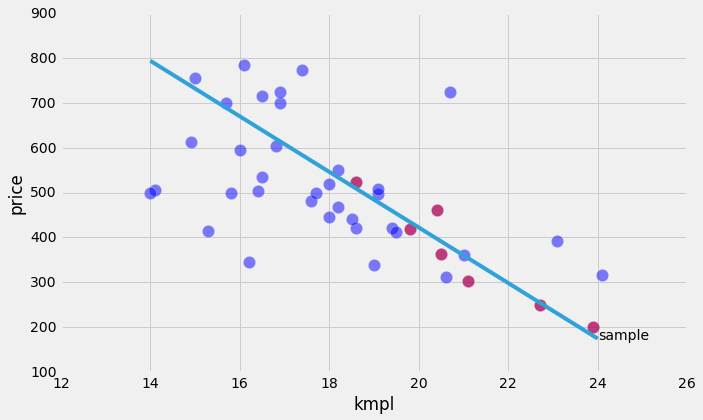

In [10]:
# Plot the population and the sample
plt.scatter(pop.kmpl, pop.price, s = 150, alpha = 0.5 )
plt.scatter(sample.kmpl, sample.price, s = 150, alpha = 0.5, c = 'r')

# Plot the OLS Line - Sample
beta_0_s, beta_1_s = 1662, -62 
x = np.arange(min(pop.kmpl),max(pop.kmpl),1)

plt.xlabel('kmpl')
plt.ylabel('price')

y_s = beta_0_s + beta_1_s * x
plt.text(x[-1], y_s[-1], 'sample')

plt.plot(x, y_s, '-')

Let us find the best-fit OLS line for the population

In [11]:
def ols (df):
    n = df.shape[0]
    x0 = np.ones(n)
    x1 = df.kmpl
    X = np.c_[x0, x1]
    X = np.asmatrix(X)
    y = np.transpose(np.asmatrix(df.price))
    X_T = np.transpose(X)
    X_pseudo = np.linalg.inv(X_T * X) * X_T
    beta = X_pseudo * y
    return beta

In [12]:
ols(sample)

matrix([[ 1662.55977286],
        [  -62.06066946]])

In [13]:
ols(pop)

matrix([[ 1157.81674084],
        [  -36.12619236]])

So the two OLS lines are:
$$ price = 1662 - 62 * kmpl ~~~~ \textit{(sample = 7)}$$ 
$$ price = 1158 - 36 * kmpl ~~~~ \textit{(population = 42)}$$ 

Let us plot this data:

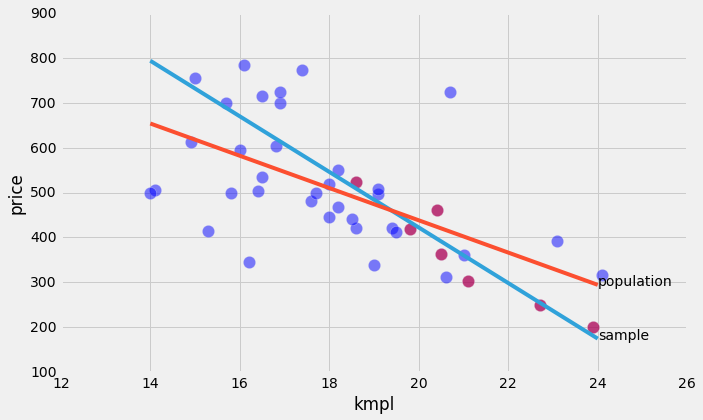

In [14]:
# Plot the population and the sample
plt.scatter(pop.kmpl, pop.price, s = 150, alpha = 0.5 )
plt.scatter(sample.kmpl, sample.price, s = 150, alpha = 0.5, c = 'r')

# Plot the OLS Line - sample and population
beta_0_s, beta_1_s = 1662, -62 
beta_0_p, beta_1_p = 1158, -36 
x = np.arange(min(pop.kmpl),max(pop.kmpl),1)

plt.xlabel('kmpl')
plt.ylabel('price')

y_s = beta_0_s + beta_1_s * x
plt.text(x[-1], y_s[-1], 'sample')

y_p = beta_0_p + beta_1_p * x
plt.text(x[-1], y_p[-1], 'population')

plt.plot(x, y_s, '-')
plt.plot(x, y_p, '-')

## Understanding Overfitting - Bootstrapping

The reason overfitting is happening is because our orginal line is really dependent on the selection of the sample of 7 observations. If we change our sample, we would get a different answer every time!

In [15]:
# Randomly select 7 cars from this dataset
sample_random = pop.sample(n=7)
sample_random

,brand,model,price,kmpl,bhp,type
37,Toyota,Etios,603,16.8,89,Sedan
2,Chevrolet,Sail Hatchback,468,18.2,82,Hatchback
7,Ford,Classic,506,14.1,100,Sedan
34,Tata,Indigo,499,14.0,65,Sedan
14,Hyundai,Verna,774,17.4,106,Sedan
23,Suzuki,Swift DZire,508,19.1,86,Sedan
24,Suzuki,SX4,715,16.5,103,Sedan


Let us write some code to randomly draw a sample of 7 and do it $z$ times and see the OLS lines and coefficients

In [16]:
ols(sample_random)

matrix([[ 447.09558264],
        [   8.12515867]])

In [17]:
def random_cars_ols (z):
    beta = []
    for i in range(z):
        
        # Select a sample and run OLS
        sample_random = pop.sample(n=7)
        b = ols(sample_random)
        beta.append([b[0,0], b[1,0]])
        
        # Get the OLS line
        x = np.arange(min(pop.kmpl), max(pop.kmpl), 1)
        y = b[0,0] + b[1,0] *x
        
        # Set the plotting area
        plt.subplot(1, 2, 1)
        plt.tight_layout()
        a = round(1/np.log(z), 2)
        
        # Plot the OLS line
        plt.plot(x,y, '-', linewidth = 1, c = 'b', alpha = a)
        plt.xlabel('kmpl')
        plt.ylabel('price')
        plt.ylim(0,1000)

        # Plot the intercept and coefficients
        plt.subplot(1,2,2)
        plt.scatter(beta[i][1],beta[i][0], s = 50, alpha = a)
        plt.xlim(-120,60)
        plt.ylim(-500,3000)
        plt.xlabel('beta_1')
        plt.ylabel('beta_0')
    
    # Plot the Popultaion line
    plt.subplot(1, 2, 1)
    beta_0_p, beta_1_p = 1158, -36 
    x = np.arange(min(pop.kmpl),max(pop.kmpl),1)
    y_p = beta_0_p + beta_1_p * x
    plt.plot(x, y_p, '-', linewidth ="4", c = 'r')

Let us do this 500 times, $ z = 500 $

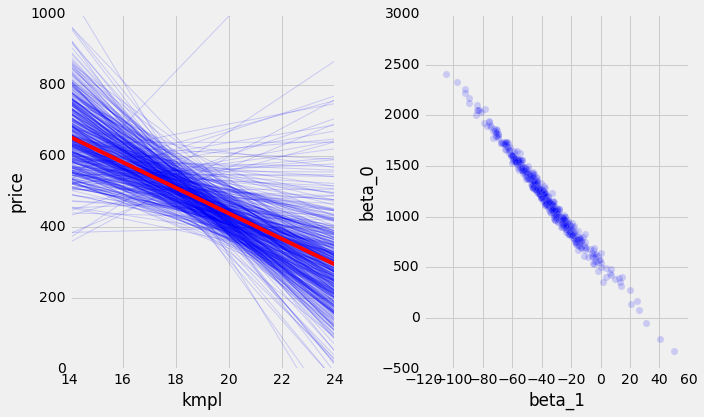

In [18]:
random_cars_ols(500)

## L2 Regularization - Ridge Regression

Now to prevent our $\beta $ from going all over the place to fit the line, we can need to constrain the constraint $\beta$

$$ \beta^{T} \beta < C $$



For OLS our error term was: 

$$ E_{ols}(\beta)=  \frac {1}{n} (y-X\beta)^{T}(y-X\beta) $$

So now we add another constraint on the $\beta$ to our minimization function

$$ E_{reg}(\beta)=  \frac {1}{n} (y-X\beta)^{T}(y-X\beta)  + \frac {\alpha}{n} \beta^{T}\beta$$

To get the minimum for this error function, we need to differentiate by $\beta^T$

$$ \nabla E_{reg}(\beta) = 0 $$

$$ \nabla E_{reg}(\beta) ={\frac {dE_{reg}(\beta)}{d\beta^T}} = \frac {2}{n} X^T(X\beta−y) + \frac {\alpha}{n} \beta= 0 $$

$$ X^T X\beta + \alpha \beta= X^T y $$

So our $\beta$ for a regularized function is

$$ \beta_{reg} = (X^T X + \alpha I)^{-1}X^Ty$$

When $ \alpha = 0 $, then it becomes OLS

$$  \beta_{ols} = (X^T X)^{-1}X^Ty$$





In [19]:
def ridge (df, alpha):
    n = df.shape[0]
    x0 = np.ones(n)
    x1 = df.kmpl
    X = np.c_[x0, x1]
    X = np.asmatrix(X)
    y = np.asmatrix(df.price.reshape(-1,1))
    X_T = np.transpose(X)
    I = np.identity(2)
    beta = np.linalg.inv(X_T * X + alpha * I ) * X_T * y
    return beta

Let us run this with slpha = 0, which is OLS

In [20]:
ridge(sample, 0)

matrix([[ 1662.55977286],
        [  -62.06066946]])

Lets increase alpha to constraint the plot and see the result

In [21]:
def ridge_plot(df, alphas, func):
    plt.scatter(df.kmpl, df.price, s = 150, alpha = 0.5)
    plt.xlabel('kmpl')
    plt.ylabel('price')
    
    # Plot the Ridge line
    for a in alphas: 
        beta = func(df, a)
        x = np.arange(min(df.kmpl), max(df.kmpl), 1)
        y = beta[0,0] + beta[1,0] * x
        plt.plot(x,y, '-', linewidth = 1, c = 'b')
        plt.text(x[-1], y[-1], '%s' % a, size = "smaller")

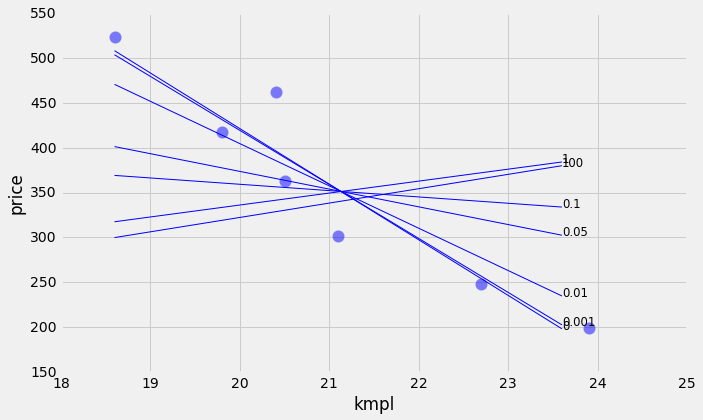

In [22]:
ridge_plot(sample, [0, 0.001, 0.01, 0.05, 0.1, 1, 100], ridge)

Let us do this with sklearn

In [54]:
from sklearn import linear_model

def ridge_sklearn(df, alpha):
    y = df.price
    X = df.kmpl.reshape(-1,1)
    model = linear_model.Ridge(alpha = alpha)
    model.fit(X,y)
    beta = np.c_[model.intercept_,model.coef_].T
    return beta

In [55]:
ridge_sklearn(sample, 1)

array([[ 1597.78472025],
       [  -58.97614314]])

In [56]:
b = ridge_sklearn(sample, 10)

In [42]:
b[0,0], b[1,0]

(1215.006868131868, -40.748626373626379)

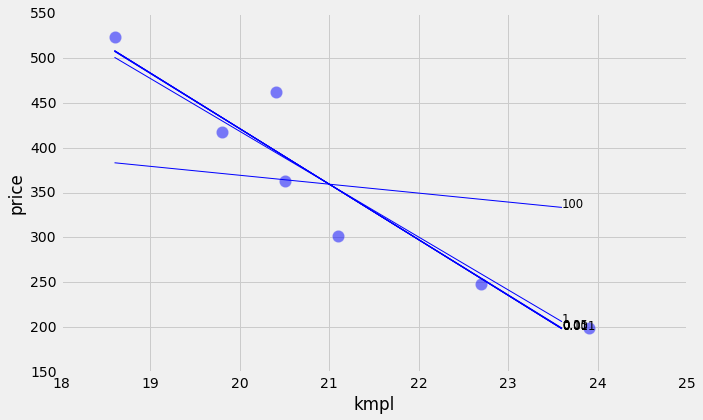

In [25]:
ridge_plot(sample, [0, 0.001, 0.01, 0.05, 0.1, 1, 100], ridge_sklearn)

Let us now run the see how this ridge regression helps in reducing overplotting 

In [62]:
def random_cars_ridge (z, alpha, func):
    beta = []
    for i in range(z):
        
        # Select a sample and run OLS
        sample_random = pop.sample(n=7)
        b = func(sample_random, alpha)
        beta.append([b[0,0], b[1,0]])
        
        # Get the OLS line
        x = np.arange(min(pop.kmpl), max(pop.kmpl), 1)
        y = b[0,0] + b[1,0] *x
        
        # Set the plotting area
        plt.subplot(1, 2, 1)
        plt.tight_layout()
        a = round(1/np.log(z), 2)
        
        # Plot the OLS line
        plt.plot(x,y, '-', linewidth = 1, c = 'b', alpha = a)
        plt.xlabel('kmpl')
        plt.ylabel('price')
        plt.ylim(0,1000)

        # Plot the intercept and coefficients
        plt.subplot(1,2,2)
        plt.scatter(beta[i][1],beta[i][0], s = 50, alpha = a)
        plt.xlim(-120,60)
        plt.ylim(-500,3000)
        plt.xlabel('beta_1')
        plt.ylabel('beta_0')
    
    # Plot the Population line
    plt.subplot(1, 2, 1)
    beta_0_p, beta_1_p = 1158, -36 
    x = np.arange(min(pop.kmpl),max(pop.kmpl),1)
    y_p = beta_0_p + beta_1_p * x
    plt.plot(x, y_p, '-', linewidth ="4", c = 'r')

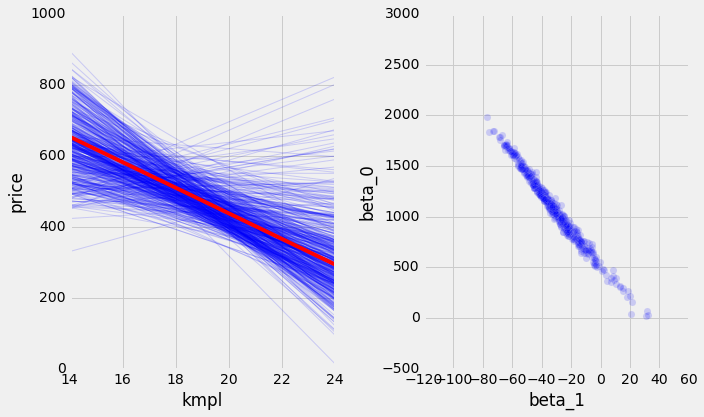

In [66]:
random_cars_ridge (500, 0.01, ridge)

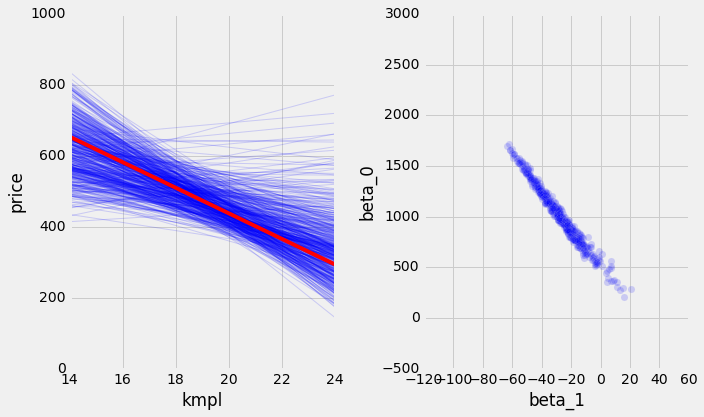

In [67]:
random_cars_ridge (500, 10, ridge_sklearn)